# Part I - Ford GoBike System Data Exploration
## by Jubril Okunade

## Table of Contents
- Introduction
- Preliminary Wrangling
- Cleaning
- Univariate Exploration
- Bivariate Exploration
- Multivariate Exploration
- Conclusions
- Limitation

## Introduction
> This dataset includes information about individual bike rides made in a bike sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load the dataset into Pandas
data =pd.read_csv('201902-fordgobike-tripdata.csv')

## Assessment

### Visual Assessment

In [3]:
data

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


### Programmatic Assessment

In [4]:
# check the shape of the dataset
data.shape

(183412, 16)

>This dataset has **183,412** rows and **16** columns.

In [5]:
# show the name and datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

> From the cell above we can see the name of each column as well as their corresponding datatype. We can also observe that a few columns have missing values.

In [6]:
# show descriptive statistics
data.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


> The cell above shows decriptive statistical information about some of the columns in the dataset.

### What is the structure of your dataset?

> This dataset has 183,412 rows and 16 columns.

### What is/are the main feature(s) of interest in your dataset?

> The features that interest me are:
- duration_sec (duration of trip in seconds).
- member_gender

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I expect that the duration_sec to help in my investigation of the trip duration. I also expect the user_type to help in my investigation of the number of users.

<ul>
    <h2>Quality Issues Discovered:</h2>
    <li>Some columns have mising values.</li>
    <li>Some columns are irrelevant to the analysis to be carried out.</li>
    <li>Some columns have the wrong datatype.</li>  
</ul>

## Cleaning

- First I will create a copy of the dataset

In [66]:
# Create a copy of the dataset and name it df
df2 =data.copy()

### Quality issue 1
- Some columns have mising values

#### Define:
- Show missing values
- Remove entries with missing values

#### Code:

In [67]:
# show missing values
df2.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [68]:
# Remove entries with missing values
df2.dropna(inplace=True)

#### Test:

In [69]:
df2.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

### Quality issue 2
- Some columns are irrelevant to the analysis to be carried out.

#### Define:
- assign irrelevant columns to a list called irr_col.
- Drop irr_col

#### Code:

In [70]:
# assign irrelevant columns to a list called irr_col
irr_col =['start_station_id','start_station_latitude','start_station_longitude','end_station_id','end_station_latitude','end_station_longitude']

# Drop irr_col
df2.drop(irr_col,axis=1,inplace=True)

#### Test:

In [71]:
df2.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_name',
       'end_station_name', 'bike_id', 'user_type', 'member_birth_year',
       'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

### Quality issue 3
- Some columns have the wrong datatype

#### Define:
- convert the start_time and end_time to datatime datatype and extract the day and month columns.
- covert bike_id and member_birth_year to string datatype.

#### Code:

In [72]:
# convert the start_time, end_time to datatime

#create function called to_dt to avoid repetitive code
def to_dt(datafr,lst):
    for n in lst:
        datafr[n]=pd.to_datetime(datafr[n])

In [73]:
col_lst=['start_time','end_time']

datafr = df2
lst = col_lst

# use to_dt function to covert the columns to datetime
to_dt(df2,col_lst)

In [74]:
# extract the day and month columns for start and end times
import datetime as dt
df2['start_day']=df2['start_time'].dt.day_name()
df2['start_month']=df2['start_time'].dt.month_name()

df2['end_day']=df2['end_time'].dt.day_name()
df2['end_month']=df2['end_time'].dt.month_name()

In [75]:
# covert bike_id and member_birth_year to string datatype
df2.bike_id =df2.bike_id.astype(str)
df2.member_birth_year =df2.member_birth_year.astype(str)

In [80]:
# remove the '.' and '0' from member_birth_year
df2.member_birth_year =df2.member_birth_year.str[:4]

#### Test:

In [81]:
df2.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_name                 object
end_station_name                   object
bike_id                            object
user_type                          object
member_birth_year                  object
member_gender                      object
bike_share_for_all_trip            object
start_day                          object
start_month                        object
end_day                            object
end_month                          object
dtype: object

#### Storing the Cleaned data

In [82]:
# store the cleaned data into ford_bk
df2.to_csv('ford_bk',index=False)

In [83]:
df2.head(3)

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_day,start_month,end_day,end_month
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,Thursday,February,Friday,March
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,Thursday,February,Friday,March
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,Thursday,February,Friday,March


In [85]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_name       174952 non-null  object        
 4   end_station_name         174952 non-null  object        
 5   bike_id                  174952 non-null  object        
 6   user_type                174952 non-null  object        
 7   member_birth_year        174952 non-null  object        
 8   member_gender            174952 non-null  object        
 9   bike_share_for_all_trip  174952 non-null  object        
 10  start_day                174952 non-null  object        
 11  start_month              174952 non-null  object        
 12  end_day         

## Univariate Exploration

> I will start by looking at the duration_sec as the main variable of interest.

### What is the distribution of Trip Durations?

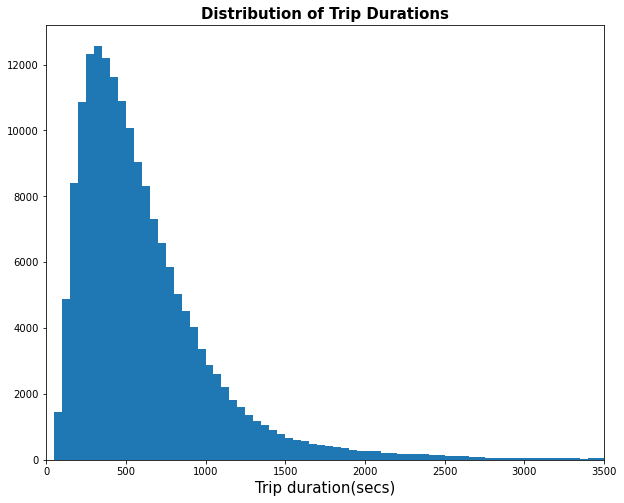

In [101]:
# start with a standard plot
binsize=50
bins=np.arange(50,df2['duration_sec'].max()+binsize,binsize)

plt.figure(figsize=(10,8))
plt.hist(data=df2,x='duration_sec',bins=bins)
plt.title('Distribution of Trip Durations',fontweight='bold',fontsize=15)
plt.xlabel('Trip duration(secs)',fontsize=15)
plt.xlim([0,3500])
plt.show()

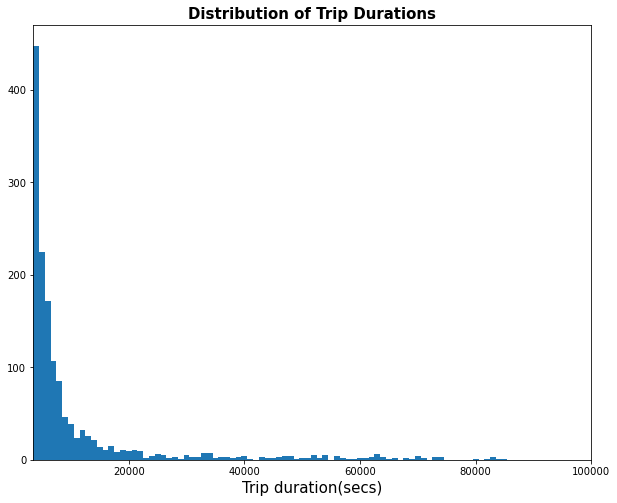

In [100]:
# the tail part of the distribution
binsize=1000
bins=np.arange(3500,df2['duration_sec'].max()+binsize,binsize)

plt.figure(figsize=(10,8))
plt.hist(data=df2,x='duration_sec',bins=bins)
plt.title('Distribution of Trip Durations',fontweight='bold',fontsize=15)
plt.xlabel('Trip duration(secs)',fontsize=15)
plt.xlim([3500,100000])
plt.show()

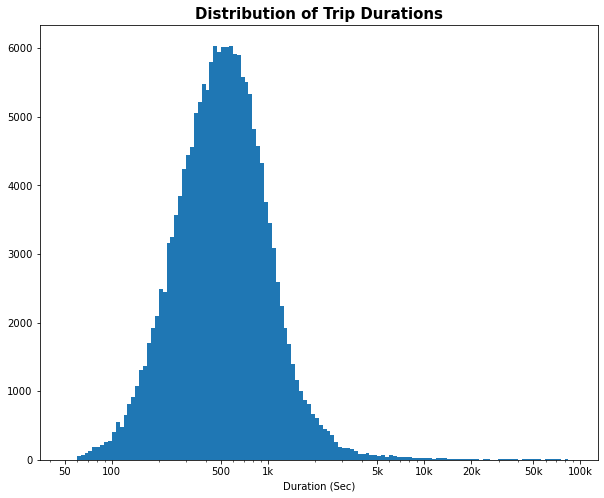

In [102]:
# there is a long tail in the distribution
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(df2['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[10, 8])
plt.hist(data = df2, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.title('Distribution of Trip Durations',fontweight='bold',fontsize=15)
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Sec)');

> **Duration_sec** has a longtailed distribution with a lot of trips falling between 100 and 500 secs. It has a peak duration around 500 secs.

### How many users for the Year

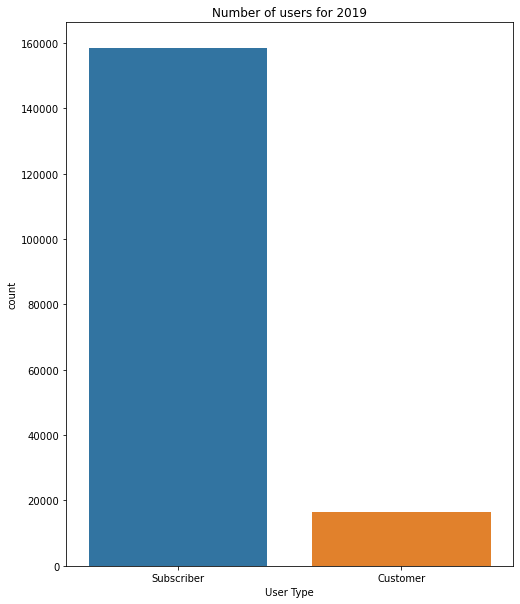

In [108]:
# Plot bar chart
users =df2['user_type'].value_counts().index
plt.figure(figsize=(8,10))
sb.countplot(data=df2,x='user_type',order=users)
plt.title('Number of users for 2019')
plt.xlabel('User Type')
plt.show()

> The barchart above shows over 150,000 as the subscriber count and over 15,000 as the customer count. This shows us that the vast majority of the users are from the subscriber base.

### What is the Gender Distribution?

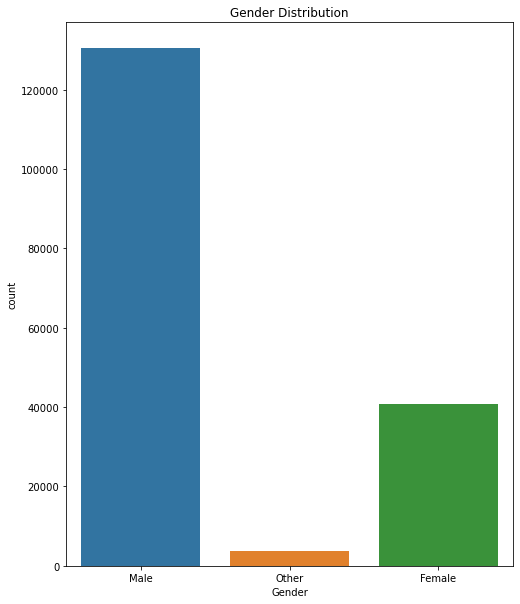

In [149]:
# barchar for gender distribution
plt.figure(figsize=(8,10))
sb.countplot(data=df2,x='member_gender')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.show()

> From the barchart above I observed that the overwhelming majority of users are males.

### How many trips in a week?

In [109]:
# covert day into ordered categories
ord_cat ={'start_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    'end_day': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday']}

for cat in ord_cat:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ord_cat[cat])
    df2[cat] = df2[cat].astype(ordered_var)

<AxesSubplot:xlabel='end_day', ylabel='count'>

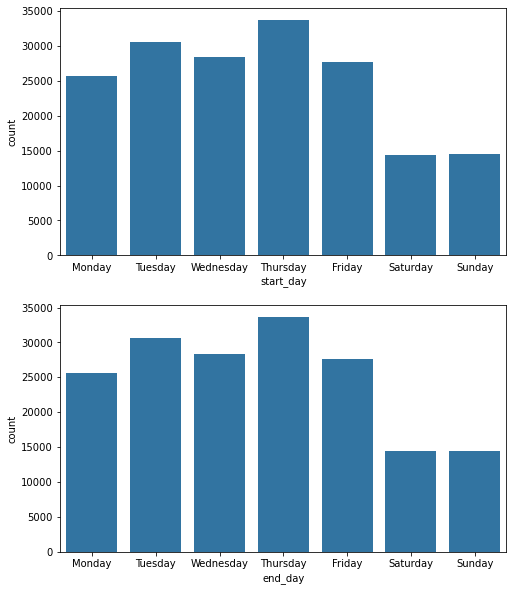

In [112]:
# ride per days
fig, ax = plt.subplots(2, figsize = [8,10])

default_color = sb.color_palette()[0]
sb.countplot(data = df2, x = 'start_day', color = default_color,  ax = ax[0])
sb.countplot(data = df2, x = 'end_day', color = default_color,  ax = ax[1])

> From the barcharts above I observed that most of the trips were taken on Thursday for both start_day and end_day. I also observed that the weekends (Saturday & Sunday) had the lowest trip count.

### Ride Frequency per Month

['174938 (99.992%)', '14 (0.008%)']

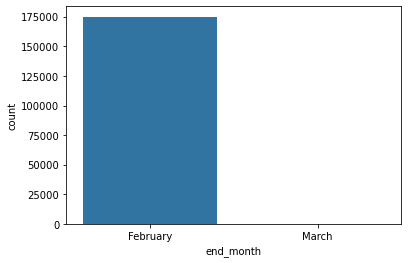

In [118]:
# ride frequency per end month
sb.countplot(x=df2['end_month'],
                   order=df2['end_month'].value_counts(ascending=False).index);
        
abs_values = df2['end_month'].value_counts(ascending=False)
rel_values = df2['end_month'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.3f}%)' for p in zip(abs_values, rel_values)]
lbls

> From the barchart above I observed that the majority of the trips were taken in February.

### Ride frequency per bike_share_for_all_trip

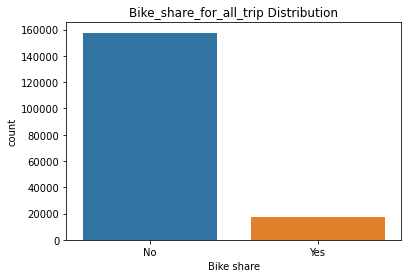

In [122]:
# Ride frequency per bike_share_for_all_trip
sb.countplot(data=df2,x='bike_share_for_all_trip')
plt.title('Bike_share_for_all_trip Distribution')
plt.xlabel('Bike share')
plt.show()

> From the chart above we observe that a vast majority of users do not use the bike_share_for_all_trip option.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The **Duration_sec** variable took on a large range of values. I had to perform a log transformation. The data peaked at around 500 secs.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distributions.

## Bivariate Exploration

### Trip Duration and Gender

- a violinplot showing the relationship between one qualitative variable(Member_gender) and one quantitative variable(Duration_sec).

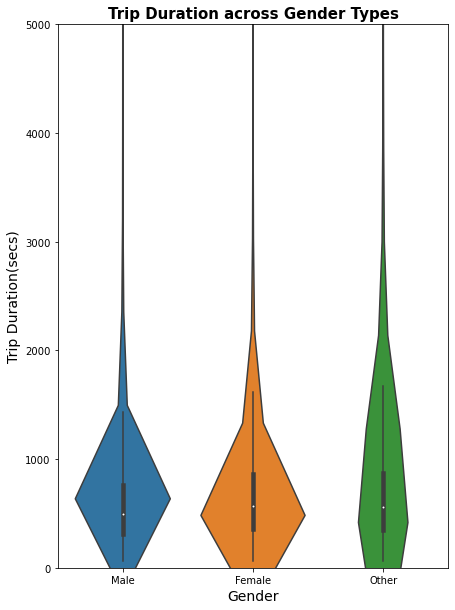

In [136]:
# a violinplot showing the relationship between one qualitative variable(Member_gender) and one quantitative variable(Duration_sec)
plt.figure(figsize=(7,10))
sb.violinplot(x='member_gender',y='duration_sec',data=df2,order=['Male','Female','Other'])
plt.ylim(0,5000)
plt.title('Trip Duration across Gender Types',fontsize=15,fontweight='bold')
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Trip Duration(secs)',fontsize=14)
plt.show()

> From the violinplot above, I observed that Female users spent more time during rides.

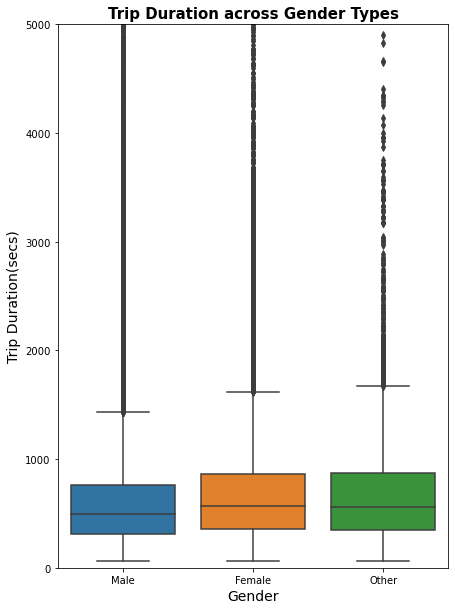

In [135]:
# a boxplot showing the relationship between one qualitative variable(Member_gender) and one quantitative variable(Duration_sec)
plt.figure(figsize=(7,10))
sb.boxplot(x='member_gender',y='duration_sec',data=df2,order=['Male','Female','Other'])
plt.ylim(0,5000)
plt.title('Trip Duration across Gender Types',fontsize=15,fontweight='bold')
plt.xlabel('Gender',fontsize=14)
plt.ylabel('Trip Duration(secs)',fontsize=14)
plt.show()

### Trip Duration and User Types

- a boxplot showing the relationship between one qualitative variable(user_type) and one quantitative variable(Duration_sec).

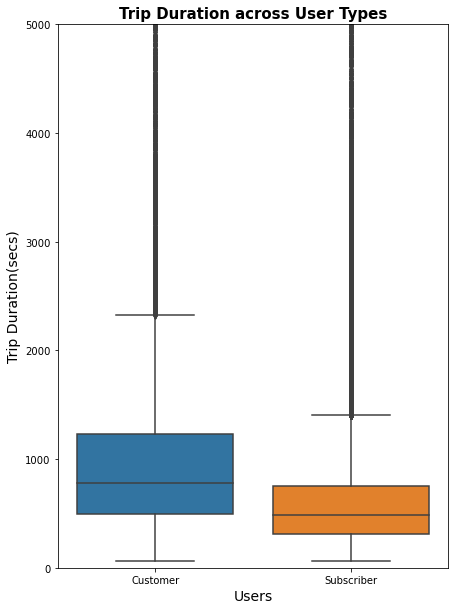

In [137]:
# a boxplot showing the relationship between one qualitative variable(user_type) and one quantitative variable(Duration_sec)
plt.figure(figsize=(7,10))
sb.boxplot(x='user_type',y='duration_sec',data=df2)
plt.ylim(0,5000)
plt.title('Trip Duration across User Types',fontsize=15,fontweight='bold')
plt.xlabel('Users',fontsize=14)
plt.ylabel('Trip Duration(secs)',fontsize=14)
plt.show()

> From the boxplot above, I observed that customers spent more time during rides.

### Trip Duration and bike_share_for_all_trip

- a violinplot showing the relationship between one qualitative variable(bike_share_for_all_trip) and one quantitative variable(Duration_sec)

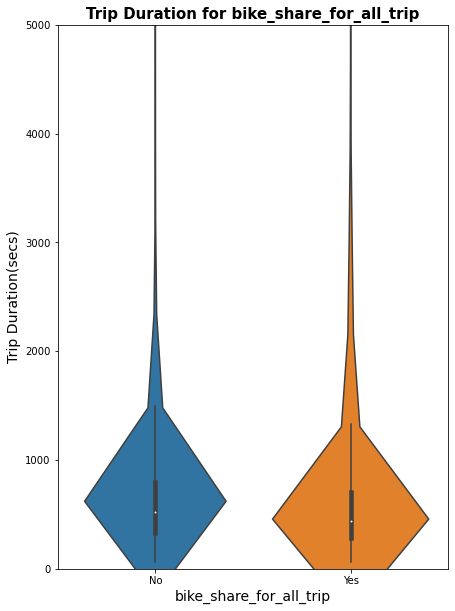

In [139]:
# a violinplot showing the relationship between one qualitative variable(bike_share_for_all_trip) and one quantitative variable(Duration_sec)
plt.figure(figsize=(7,10))
sb.violinplot(x='bike_share_for_all_trip',y='duration_sec',data=df2)
plt.ylim(0,5000)
plt.title('Trip Duration for bike_share_for_all_trip',fontsize=15,fontweight='bold')
plt.xlabel('bike_share_for_all_trip',fontsize=14)
plt.ylabel('Trip Duration(secs)',fontsize=14)
plt.show()

> From the violinplot above, I observed that on average bike share for all trips tend to be the same across all types.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The relationship observed between trip duration and user type was interesting because it showed that even though we have a higher subscriber count, the customer usertype spends more time during rides.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> I observed that on average bike_share_for_all_trip tend to be the same across all types.

## Multivariate Exploration

### Trip Duration across weekdays and User type

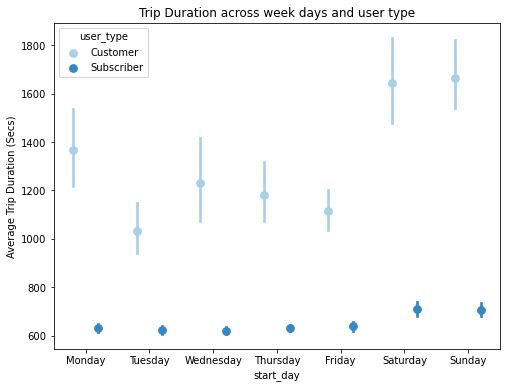

In [144]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df2, x ='start_day', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across week days and user type')
plt.ylabel('Average Trip Duration (Secs)')

ax.set_yticklabels([],minor = True)
plt.show()

> Customers travel longer distance regardless of the day of the week but it is longer on weekends. While Subscribers travel shorter distances with slight increases on weekends.

### Trip Duration across Gender and User type

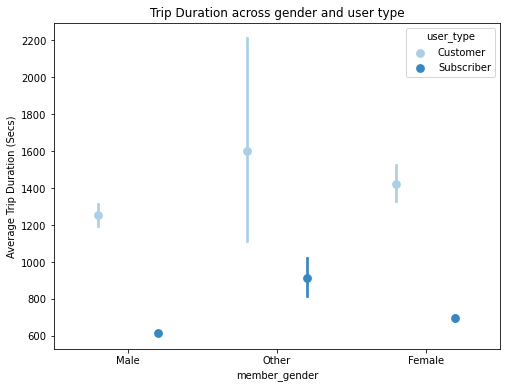

In [143]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df2, x ='member_gender', y = 'duration_sec', hue = 'user_type',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and user type')
plt.ylabel('Average Trip Duration (Secs)')

ax.set_yticklabels([],minor = True)
plt.show()

> From the plot above we can observe that for both customers and subscribers the other gender group spent the most time on rides.

### Trip Duration across Gender and bike_share_for_all_trip 

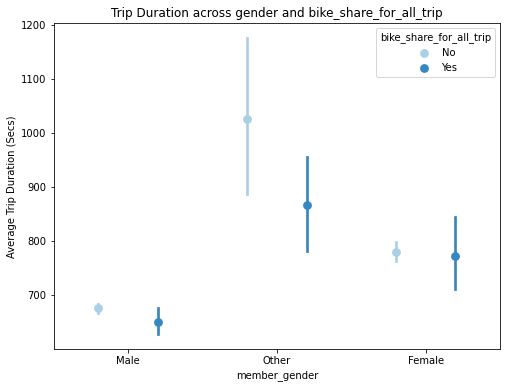

In [148]:
fig = plt.figure(figsize = [8,6])
ax = sb.pointplot(data = df2, x ='member_gender', y = 'duration_sec', hue = 'bike_share_for_all_trip',
           palette = 'Blues', linestyles = '', dodge = 0.4)
plt.title('Trip Duration across gender and bike_share_for_all_trip')
plt.ylabel('Average Trip Duration (Secs)')

ax.set_yticklabels([],minor = True)
plt.show()

> From the plot in the cell above we can observe that the other gender group took the longest rides for both bike sharing and non-bike sharing groups.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I observed the relationship between Trip Duration, Gender and User type. It showed that both customers and subscribers the other gender group spent the most time on rides.

### Were there any interesting or surprising interactions between features?

> I found the interaction between Trip duration,days of the week and user type very interestion because customers travel longer distance regardless of the day of the week but it is longer on weekends. While Subscribers travel shorter distances with slight increases on weekends.

## Conclusions

- Duration_sec has a longtailed distribution with a lot of trips falling between 100 and 500 secs. It has a peak duration around 500 secs.
- I observed that the overwhelming majority of users are males.
- I observed that most of the trips were taken on Thursday for both start_day and end_day. I also observed that the weekends (Saturday & Sunday) had the lowest trip count.
- A vast majority of users do not use the bike_share_for_all_trip option.
- Female users spent more time during rides.
- Customers spent more time during rides.
- Customers travel longer distance regardless of the day of the week but it is longer on weekends. While Subscribers travel shorter distances with slight increases on weekends.
- The other gender group took the longest rides for both bike sharing and non-bike sharing groups.

## Limitation

> For this section of the report, I will draw some conclusions based on the analysis that I carried out in the sections above. **However, it is important to note that the conclusions drawn from this analysis are limited**. This is because a significant portion of the original data had been removed during the cleaning process. Therefore, I worked with a much smaller sample size and as such does not necessarily represent the population.